## Sufficient Condition on Vector Field to have a Limit Cycle

We explore a different parametrization of a dynamical system in $R^2$ that exhibits a limit cycle about the origin. 

Consider dynamics $(\dot r, \dot \theta) = v(r, \theta)$. We seek to derive sufficient conditions on $v$ such that $v$ exhibits a limit cycle, i.e. a closed loop $S_v$ that is asymptotically stable. 

Denote $v_\theta$ to be the restriction of $v$ to the ray $r \in [0, \infty]$ along a given angle $\theta$ from the origin. 

We argue that the following conditions are sufficient: 
1. For all $\theta$, exist constants $a_\theta < b_\theta$ such that $v_\theta(a) > 0, v_\theta(b) < 0$. 
2. $v_\theta$ is monotonic decreasing on $[a_\theta, b_\theta]$
3. $d\theta$ is strictly positive

Condition 1. and 3. ensure that the two conditions of the Poincare Bendixson Theorem are satisfied, so an invariant loop exists. Condition 2. ensures that this loop is unique and attracting - this follows since the zeroes $r_\theta^* = 0$ of each $v_\theta$ exist and are unique.


## Parametrizing $v$ 




In [8]:
import numpy as np
from torch_vector_field import vector_field, utilities, plotting

In [9]:
def cart_to_polar(x):
    x1, x2 = x[...,0], x[...,1]
    r = np.sqrt(x1 ** 2 + x2 ** 2)
    theta = np.arctan2(x2, x1)
    return np.stack([r, theta], axis=-1)

def polar_to_cart(p):
    r, theta = p[...,0], p[...,1]
    x1 = r * np.cos(theta)
    x2 = r * np.sin(theta)
    return np.stack([x1, x2], axis=-1)

def dpolar_to_dcart(p, dp):
    dr, dtheta = dp[...,0], dp[...,1]
    r, theta = p[...,0], p[...,1]
    dx = dr * np.cos(theta) + r * (-np.sin(theta)) * dtheta 
    dy = dr * np.sin(theta) + r * ( np.cos(theta)) * dtheta
    return np.stack([dx, dy], axis=-1)

In [10]:
# Test implementation of coordinate transforms

x_orig = np.random.uniform(size=(2,))
x_pred = polar_to_cart(cart_to_polar(x_orig))

print(x_orig, x_pred)

[0.51264613 0.42502424] [0.51264613 0.42502424]


### A First Try

Let's construct such an example of $v$. 

The first parametrization we test is simple linear scaling of dr and constant dtheta.  

In [11]:
def simple_vector_field(p):
    """p: a 2D point in polar coordinates. Can be batched"""
    r, theta = p[...,0], p[...,1]
    dr = -r + 2
    dtheta = 1
    return np.stack([dr, dtheta], axis=-1)

def transformed_vector_field(x):
    """p: a 2D point in Cartesian coordinates. Can be batched"""
    p = cart_to_polar(x)
    dp = simple_vector_field(p)
    dx = dpolar_to_dcart(p, dp)
    return dx

v_field = vector_field.FunctionalVectorField(transformed_vector_field)
v_field.get_gradient(np.array([0.5, 0.5]))

array([0.41421356, 1.41421356])

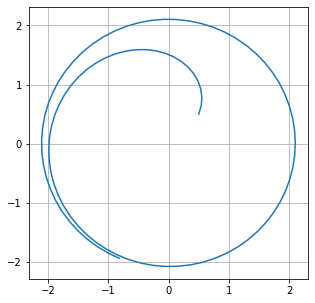

In [12]:
h = utilities.simulate_trajectory(
    v_field, 
    np.array([0.5, 0.5]),
    step_size=0.1, 
    num_iters = 100,
    grad_clip=1,
    ascending=True
)
plotting.plot_histories([h], figsize=(5,5))

## A Parametric Model

Now we consider a more general parametrization of $v$, still respecting the 3 conditions we laid out above. 